<a href="https://colab.research.google.com/github/abishekabi/amber-detector/blob/main/car_color_Amber_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/amber-detector'

%cd 'gdrive/My Drive/Colab Notebooks/amber-detector'

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/amber-detector'
/content/gdrive/My Drive/Colab Notebooks/amber-detector


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [ ]:
!pip install colorthief
!pip install webcolors==1.3

In [ ]:
#!wget "http://imagenet.stanford.edu/internal/car196/cars_train.tgz"
# !wget "https://www.dropbox.com/s/uwa7c5uz7cac7cw/VMMRdb.zip?dl=0"

# !mkdir data_VMMRdb
#!unzip -nd data_VMMRdb/ data.zip

# !wget "http://imagenet.stanford.edu/internal/car196/car_ims.tgz"
# !wget "http://imagenet.stanford.edu/internal/car196/cars_annos.mat"

In [ ]:
!ls

'Abishek-Amber detector.ipynb'	 cars_annos.mat    data_VMMRdb
'Amber detector.ipynb'		 color		   out.jpg
 car_ims			 cropped_img.jpg   vmmrdb-resnet-50.t7


# Color Detection

In [ ]:
import scipy.io
car_annos = scipy.io.loadmat('cars_annos.mat')

Text(0.5, 1.0, 'car_ims/000002.jpg')

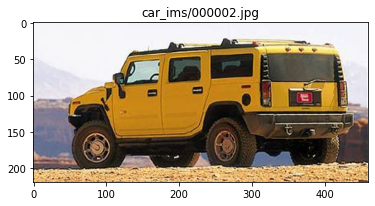

In [ ]:
imshow(imread(car_annos['annotations'][0][1][0][0]))
title(car_annos['annotations'][0][1][0][0])

In [ ]:
print("Total Car Classes: ", len(car_annos['class_names'][0]))
print("Some car name", car_annos['class_names'][0][0])

Total Car Classes:  196
Some car name ['AM General Hummer SUV 2000']


### Check detected object /car boundary

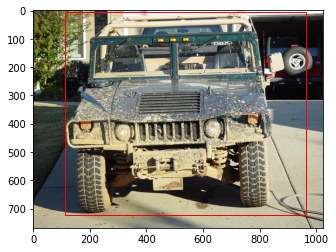

In [ ]:

im = np.array(Image.open(car_annos['annotations'][0][0][0][0]), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((car_annos['annotations'][0][0][1][0][0], car_annos['annotations'][0][0][2][0][0]), 
                         car_annos['annotations'][0][0][3][0][0], car_annos['annotations'][0][0][4][0][0],
                         linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

## Consider the image that's inside the boundary

In [ ]:
import webcolors
from colorthief import ColorThief

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        color_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        color_name = closest_colour(requested_colour)
    return color_name

# requested_colour = (215, 201, 145)
# actual_name, closest_name = get_colour_name(requested_colour)

# print("Actual colour :", actual_name, ", closest colour :", closest_name)

def detect_car_color(im, x, y, w, h):
  # crop image
  cropped_img = np.array(im, dtype=np.uint8)[y:y+h, x:x+w]
  imageio.imwrite('cropped_img.jpg', cropped_img)
  
  # color theif library can only read the image from file, so not passing numpy array
  color_thief = ColorThief('./cropped_img.jpg')        
  # get the dominant color
  dominant_color = color_thief.get_color(quality=1)
  palette = color_thief.get_palette(color_count=6)

  # get nearest color
  # r, g, b =palette[1]
  # r = int(round( ( r / 255.0 ) * 5 ) * 51)
  # g = int(round( ( g / 255.0 ) * 5 ) * 51)
  # b = int(round( ( b / 255.0 ) * 5 ) * 51)
  
  color_name = get_colour_name(palette[1])
  
  #color_name = webcolors.rgb_to_name((r,g,b),spec='css3')

  return color_name

#### Test car color

car color:  gainsboro


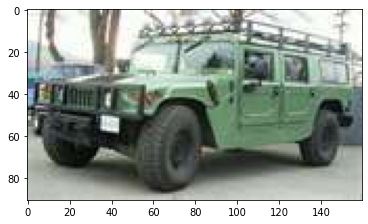

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import imageio


for i in range(16,17):
  x=car_annos['annotations'][0][i][1][0][0]
  y=car_annos['annotations'][0][i][2][0][0]
  w=car_annos['annotations'][0][i][3][0][0]
  h=car_annos['annotations'][0][i][4][0][0]
  im_open = Image.open(car_annos['annotations'][0][i][0][0])
  imshow(im_open)
  print("car color: ", detect_car_color(im_open, x,y,w,h))

  